In [1]:
# Setting up the notebook
import sys
import os

# Import local libraries
sys.path.append('../exercises_complements')
from shared_functions import check_task_with_solution
from darcy_functions import launch_darcy_experiment_interactive
from darcy_several_layers_keq import exercise_aquifers_layered_keq_attribution

# Exercise 4 : Darcy law

## Context

This exercise helps you to familiarize with Darcy law, for 1D and steady state conditions.

A soil layer has the following properties :
- length $L$ : 40 $\text{m}$
- hydraulic conductivity $K$ :  $5 \cdot 10^{-5} \text{m}\text{s}^{-1}$

The water goes horizontally through the layer. Inflow and outflow specific discharges are equal at steady state. The discharge per unit width of the aquifer can be measured and it is found to be $q$ = $3 \cdot 10^{-6}\text{m}^2\text{s}^{-1}$.

An observation wells is installed at $x_0$ and measures the water table hight there: $h(x_0)$= 50m.


In [5]:


# Check the tasks for this exercise
check_task_with_solution("task04_1")
check_task_with_solution("task04_2")


## Task 1:
Based on given data, estimate the water table level at $x$ = 200m :


Output()

Button(description='Show Solution', disabled=True, style=ButtonStyle())

Output()


## Task 2:
Based on given data, estimate the water table level at $x$ = 400m :


Output()

Button(description='Show Solution', disabled=True, style=ButtonStyle())

Output()

## Interactive exploration

The following tool offers an interactive illustration of the situation previously studied. 

The default values of $K$ and $q$ are the ones fixed previously, which you used for the Tasks 1 and 2. 

You are encouraged to use the sliders in order to see how changes in $K$ and/or $q$ impact the water table profile $h(x)$.

In [6]:

# Check the tasks for this exercise
launch_darcy_experiment_interactive()

interactive(children=(FloatSlider(value=5e-05, description='K:', max=0.0001, min=1e-05, step=1e-05), FloatSlid…

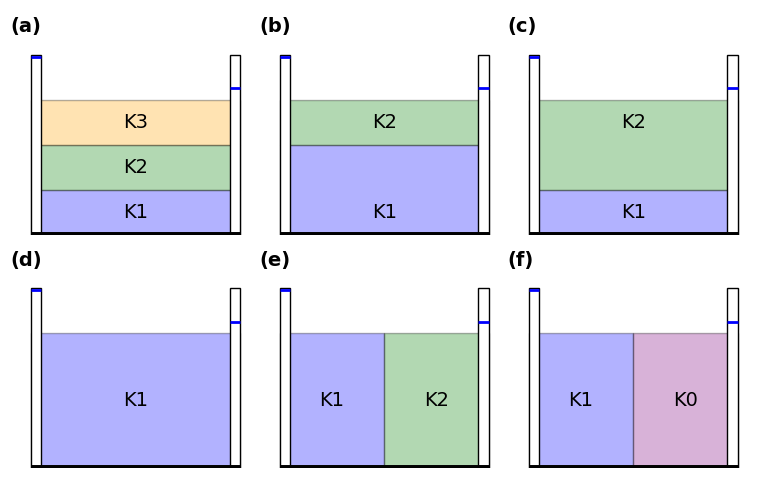

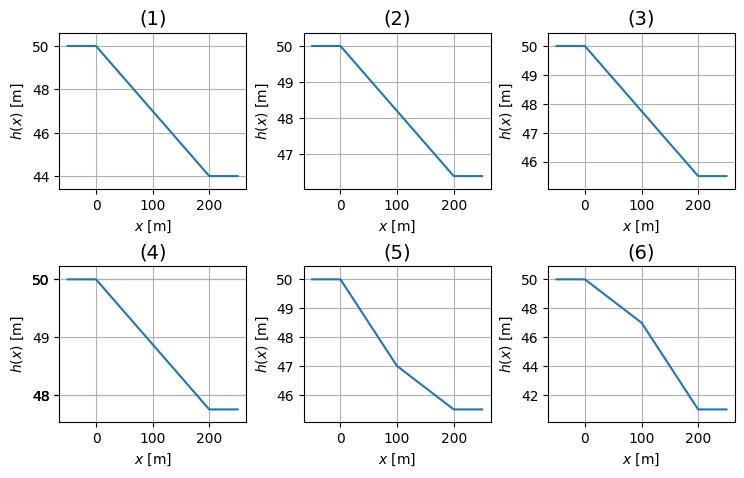

  ## Submission <br>
    ### Enter the values of $K_{eq}$ *in um/s* and the profile number (1-6) for each schematic. Once you have entered the values, click the "Submit All" button to check your answers. <br>

GridBox(children=(Label(value='Schematic:', layout=Layout(align_items='center', border_bottom='solid 1px black…

Button(description='Submit All', layout=Layout(height='30px', width='150px'), style=ButtonStyle())

Output()

In [ ]:
exercise_aquifers_layered_keq_attribution()

Develppment


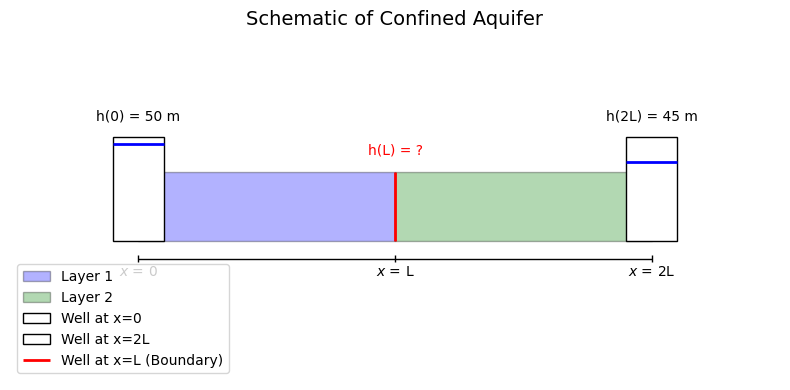

### Submit the value of $h$ at $x = L$

Output()

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

def interactive_confined_aquifer():
    """
    Interactive tool to visualize a confined aquifer with two layers of differing K values.
    Initially, only the schematic is shown, and the student is asked to input h(L).
    After submission, the correction is shown, and the h(x) plot is displayed below the schematic.
    """
    # Parameters
    L = 10  # Length of each layer (m)
    K1 = 5e-5  # Hydraulic conductivity of the first layer (m/s)
    K2 = 1e-5  # Hydraulic conductivity of the second layer (m/s)
    q = 3e-6  # Specific discharge (m^2/s)
    h0 = 50  # Hydraulic head at x = 0 (m)
    h2L = 45  # Hydraulic head at x = 2L (m)

    # Calculate h(x) for the two layers
    x1 = np.linspace(0, L, 100)  # x values for the first layer
    x2 = np.linspace(L, 2 * L, 100)  # x values for the second layer
    h1 = h0 - (q / K1) * x1  # h(x) in the first layer
    h2 = h1[-1] - (q / K2) * (x2 - L)  # h(x) in the second layer

    # Function to draw the schematic# Function to draw the schematic
    def draw_schematic():
        fig, ax = plt.subplots(figsize=(8, 4))

        # Draw the two layers
        ax.add_patch(plt.Rectangle((0, 4), L, 2, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer 1"))
        ax.add_patch(plt.Rectangle((L, 4), L, 2, edgecolor="black", facecolor="green", alpha=0.3, label="Layer 2"))

        # Draw the wells as piezometers (tubes)
        # Well at x=0
        ax.add_patch(plt.Rectangle((-1, 4), 2, 3, edgecolor="black", facecolor="white", label="Well at x=0"))
        ax.hlines(6.8, -1, 1, colors="blue", linewidth=2)  # Water table level inside the well

        # Well at x=2L
        ax.add_patch(plt.Rectangle((2 * L - 1, 4), 2, 3, edgecolor="black", facecolor="white", label="Well at x=2L"))
        ax.hlines(6.3, 2 * L - 1, 2 * L + 1, colors="blue", linewidth=2)  # Water table level inside the well

        # Well at x=L (Boundary)
        ax.vlines(L, 4, 6, colors="red", linewidth=2, label="Well at x=L (Boundary)")

        # Add labels for the wells
        ax.text(0, 7.5, f"h(0) = {h0} m", fontsize=10, ha="center")
        ax.text(L, 6.5, "h(L) = ?", fontsize=10, ha="center", color="red")
        ax.text(2 * L, 7.5, f"h(2L) = {h2L} m", fontsize=10, ha="center")

        # Add the x-axis at the bottom
        ax.hlines(3.5, 0, 2 * L, colors="black", linewidth=1)  # Horizontal line for the x-axis
        ax.text(0, 3, "$x$ = 0", fontsize=10, ha="center")  # Label for x=0
        ax.text(L, 3, "$x$ = L", fontsize=10, ha="center")  # Label for x=L
        ax.text(2 * L, 3, "$x$ = 2L", fontsize=10, ha="center")  # Label for x=2L

        # Add ticks on the x-axis
        ax.vlines(0, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=0
        ax.vlines(L, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=L
        ax.vlines(2 * L, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=2L

        ax.set_xlim(-5, 2 * L + 5)
        ax.set_ylim(0, 10)
        ax.set_title("Schematic of Confined Aquifer", fontsize=14)
        ax.set_xlabel("$x$ [m]", fontsize=12)
        ax.axis("off")
        ax.legend(fontsize=10)

        plt.tight_layout()
        plt.show()

    # Function to draw the h(x) plot
    def draw_hx_plot():
        fig, ax = plt.subplots(figsize=(4, 4))

        # Plot h(x)
        ax.plot(x1, h1, label=f"Layer 1 (K = {K1} m/s)", color="blue")
        ax.plot(x2, h2, label=f"Layer 2 (K = {K2} m/s)", color="green")
        ax.axvline(L, color="red", linestyle="--", label="x = L (Boundary)")

        ax.set_title("Hydraulic Head $h(x)$ vs Horizontal Location $x$", fontsize=14)
        ax.set_xlabel("$x$ [m]", fontsize=12)
        ax.set_ylabel("$h(x)$ [m]", fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True)

        plt.tight_layout()
        plt.show()

    # Display the schematic
    draw_schematic()

    # --- Interactive Input for h(L) ---
    display(Markdown("### Submit the value of $h$ at $x = L$"))
    h_input = widgets.FloatText(
        description="h(L):",
        style={'description_width': 'initial'}
    )
    submit_button = widgets.Button(description="Submit")
    output = widgets.Output()

    def on_submit(b):
        with output:
            clear_output(wait=True)
            h_L = h_input.value
            correct_h_L = h1[-1]  # Theoretical value of h(L)
            if np.isclose(h_L, correct_h_L, atol=0.1):
                display(Markdown(f"**Correct!** The value of $h(L)$ is approximately {correct_h_L:.2f} m."))
            else:
                display(Markdown(f"**Incorrect.** The correct value of $h(L)$ is approximately {correct_h_L:.2f} m."))

            # Draw the h(x) plot below the schematic
            display(Markdown("### Hydraulic Head $h(x)$ Plot"))
            draw_hx_plot()

    submit_button.on_click(on_submit)
    display(widgets.HBox([h_input, submit_button]), output)

# Call the function
interactive_confined_aquifer()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import ipywidgets as widgets

from IPython.display import display, Markdown

def draw_schematic(ax, label, configuration):
    """
    Draws the schematic of the confined aquifer on the given axis based on the configuration.
    """
    L = 50  # Total length of the aquifer (m)
    h0 = 50  # Hydraulic head at x = 0 (m)
    h2L = 45  # Hydraulic head at x = 2L (m)
    type_formula = "vertical"  # Default type_formula


    # Draw the layers based on the configuration
    if configuration == 1:  # Single layer of K1
        type_formula = "horizontal"
        ax.add_patch(patches.Rectangle((0, 0), 2*L, 2, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((0, 2), 2*L, 2, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))
        ax.add_patch(patches.Rectangle((0, 4), 2*L, 2, edgecolor="black", facecolor="orange", alpha=0.3, label="Layer K3"))
        ax.text(L, 1, "K1", color="black", fontsize=14, ha="center", va="center")
        ax.text(L, 3, "K2", color="black", fontsize=14, ha="center", va="center")
        ax.text(L, 5, "K3", color="black", fontsize=14, ha="center", va="center")

    elif configuration == 2:  # Vertically 2 layers: 2/3 K1, 1/3 K2
        type_formula = "horizontal"
        ax.add_patch(patches.Rectangle((0, 0), 2*L, 4, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((0, 4), 2*L, 2, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))
        ax.text(L, 1, "K1", color="black", fontsize=14, ha="center", va="center")
        ax.text(L, 5, "K2", color="black", fontsize=14, ha="center", va="center")

    elif configuration == 3:  # Vertically 2 layers: 1/3 K1, 2/3 K2
        type_formula = "horizontal"
        ax.add_patch(patches.Rectangle((0, 0), 2*L, 2, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((0, 2), 2*L, 4, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))
        ax.text(L, 1, "K1", color="black", fontsize=14, ha="center", va="center")
        ax.text(L, 5, "K2", color="black", fontsize=14, ha="center", va="center")

    elif configuration == 4:  # Vertically 3 layers: 1/3 K1, 1/3 K2, 1/3 K3
        type_formula = "vertical"
        ax.add_patch(patches.Rectangle((0, 0), 2*L, 6, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.text(L, 3, "K1", color="black", fontsize=14, ha="center", va="center")
        
    elif configuration == 5:  # Horizontally 1/2 K1 and 1/2 K2
        type_formula = "vertical"
        ax.add_patch(patches.Rectangle((0, 0), 2*L / 2, 6, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((2*L / 2, 0), 2*L / 2, 6, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))
        ax.text(L/2, 3, "K1", color="black", fontsize=14, ha="center", va="center")
        ax.text(3*L/2, 3, "K2", color="black", fontsize=14, ha="center", va="center")

    elif configuration == 6:  # Horizontally 1/2 K1 and 1/2 K4
        type_formula = "vertical"
        ax.add_patch(patches.Rectangle((0, 0), 2*L / 2, 6, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((2*L / 2, 0), 2*L / 2, 6, edgecolor="black", facecolor="purple", alpha=0.3, label="Layer K4"))
        ax.text(L/2, 3, "K1", color="black", fontsize=14, ha="center", va="center")
        ax.text(3*L/2, 3, "K0", color="black", fontsize=14, ha="center", va="center")

    # Draw the wells as piezometers (tubes)
    # Well at x=0
    ax.add_patch(patches.Rectangle((0,0), 5, 8, edgecolor="black", facecolor="white", label="Well at x=0"))
    ax.hlines(7.9, 0, 5, colors="blue", linewidth=2)  # Water table level inside the well

    # Well at x=2L
    ax.add_patch(patches.Rectangle((2 * L - 5, 0), 5, 8, edgecolor="black", facecolor="white", label="Well at x=2L"))
    ax.hlines(6.5, 2 * L - 5, 2 * L, colors="blue", linewidth=2)  # Water table level inside the well

    # Add labels for the wells
    #ax.text(0, 7.5, f"h(0) = {h0} m", fontsize=12, ha="center")
    #ax.text(2 * L, 7.5, f"h(2L) = {h2L} m", fontsize=12, ha="center")

    # Add the x-axis at the bottom
    ax.hlines(0, 0, 2 * L, colors="black", linewidth=5)  # Horizontal line for the x-axis
    # ax.text(0, 3.2, "$x$ = 0", fontsize=12, ha="center")  # Label for x=0
    # ax.text(2 * L, 3.2, "$x$ = 2L", fontsize=12, ha="center")  # Label for x=2L

    # Add ticks on the x-axis
    #ax.vlines(0, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=0
    #ax.vlines(L, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=L
    #ax.vlines(2 * L, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=2L

    # Add subplot label
    ax.text(-10, 9, f"({label})", fontsize=14, fontweight="bold", ha="left")

    ax.set_xlim(-5, 2 * L + 5)
    ax.set_ylim(0, 10)
    ax.axis("off")

def K_eq(type_layers, K1, K2, K3, L1, L2, L3,L=None):
    if type_layers == "vertical":
        # Vertical layers
        L = L1 + L2
        K_eq = L / ((L1 / K1) + (L2 / K2))
    elif type_layers == "horizontal":
        # Horizontal layers
        K_eq = (K1 * L1 + K2 * L2 + K3 * L3) / (L1 + L2 + L3)
    else:
        raise ValueError("Invalid type of layers. Use 'vertical' or 'horizontal'.")
    return K_eq


def h_function_plot(type_layers, K1, K2, K3, L1, L2, L3, L=None, h0=50, q=3e-7):
    """
    Generates the hydraulic head h(x) based on the type of layering (vertical or horizontal).
    """
      # x values for the entire domain
    A= 1  # Cross-sectional area (m^2)

    if type_layers == "horizontal":
        if K3 is None:
            raise ValueError("K3 must be provided for vertical layers.")

        x_bef = np.linspace(-50, 0, 100)
        x_aft = np.linspace(L, L+50, 100)
        x = np.linspace(0, L, 500)
        
        h = h0 - (q/(K_eq(type_layers, K1, K2, K3, L1, L2, L3)*A)*x)
        h_bef = h0*np.ones_like(x_bef)
        h_aft = h[-1]*np.ones_like(x_aft)

        h = np.concatenate([h_bef, h, h_aft])
        x = np.concatenate([x_bef, x, x_aft])

        correction_K_eq.append(K_eq(type_layers, K1, K2, K3, L1, L2, L3)*1e6)  # Convert to um/s

        return x, h

    elif type_layers == "vertical":
        L=L1+L2+L3

        x_bef = np.linspace(-50, 0, 100)
        x_aft = np.linspace(L, L+50, 100)
        x = np.linspace(0, L, 500)
        x1 = x[x <= L1]
        x2 = x[x > L1]

        h1 = h0 - (q / (K1*A)) * (x1)
        h2 = h1[-1] - (q / (K2*A)) * (x2 - L1)
        h_bef = h0*np.ones_like(x_bef)
        h_aft = h2[-1]*np.ones_like(x_aft)

        h = np.concatenate([h_bef, h1, h2, h_aft])
        x = np.concatenate([x_bef, x1, x2, x_aft])

        correction_K_eq.append( (K_eq(type_layers, K1, K2, K3, L1, L2, L3))*1e6) # Convert to um/s

        return x, h

    else:
        raise ValueError("Invalid type_layers. Use 'vertical' or 'horizontal'.")


n=1.5
# Generate and plot the schematics
fig, axes = plt.subplots(2, 3, figsize=(11.2/n, 7/n),layout="constrained")  # Reduced overall figure height
labels = ["a", "b", "c", "d", "e", "f"]
configurations = [1, 2, 3, 4, 5, 6]
# Draw the schematic in each subplot
for ax, label, config in zip(axes.flat, labels, configurations):
    draw_schematic(ax, label, config)
plt.show()


# Generate and plot the h(x) profiles
fig, axes = plt.subplots(2, 3, figsize=(11/n, 7/n),layout="constrained")
labels = ["1", "2", "3", "4", "5", "6"]
global correction_K_eq
correction_K_eq = []
profiles = [
    h_function_plot("horizontal", 5e-5, 2e-5, 1e-5, 10, 10, 10, 200),
    h_function_plot("horizontal", 2e-5, 1e-5, 1e-5, 10, 10, 10, 200),
    h_function_plot("horizontal", 2e-5, 2e-5, 1e-5, 10, 10, 10, 200),
    h_function_plot("vertical", 1e-5, 1e-5, 0, 100, 100, 0),
    h_function_plot("vertical", 1e-5, 2e-5, 0, 100, 100, 0),
    h_function_plot("vertical", 1e-5, 5e-6, 0, 100, 100, 0),
]
shuffled_indices = np.random.permutation(6)  # Shuffle the profiles
# Create an array to store the schematic-to-profile mapping
correction_profile_to_schematic = [shuffled_indices.tolist().index(i) + 1 for i in range(6)]

# Plot the shuffled h(x) profiles
for ax, idx, label in zip(axes.flat, shuffled_indices, labels):
    x, h = profiles[idx]
    ax.plot(x, h)
    ax.set_title(f"({label})", fontsize=14)
    ax.set_xlabel("$x$ [m]")
    ax.set_ylabel("$h(x)$ [m]")
    ax.set_yticks(np.round(ax.get_yticks(), 0))  # Round to the nearest unit
    ax.grid()
    # Adjust ylim 
    h_min, h_max = h.min(), h.max()
    padding = (h_max - h_min) * 0.1  # Calculate padding as 10% of the range
    ax.set_ylim(h_min - padding, h_max + padding)  # Add padding below h_min and above h_max

plt.show()




# Create input widgets for K_eq and Profile
k_eq_inputs = [widgets.Text(layout=widgets.Layout(width='100px')) for _ in range(6)]
profile_inputs = [widgets.Text(layout=widgets.Layout(width='100px')) for _ in range(6)]

display(Markdown(r"""  ## Submission <br>
### Enter the values of $K_{eq}$ *in um/s* and the profile number (1-6) for each schematic. Once you have entered the values, click the "Submit All" button to check your answers. <br>"""))

# Create the interactive table
table = widgets.GridBox(
    children=[
        widgets.Label(value="Schematic:", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
        widgets.Label(value="(a)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
        widgets.Label(value="(b)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
        widgets.Label(value="(c)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
        widgets.Label(value="(d)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
        widgets.Label(value="(e)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
        widgets.Label(value="(f)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
        widgets.Label(r"""K_{eq}""", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
        *k_eq_inputs,
        widgets.Label(value="Profile (1-6):", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
        *profile_inputs,
    ],
    layout=widgets.Layout(grid_template_columns="150px repeat(6, 100px)")
)

submit_button = widgets.Button(description="Submit All", layout=widgets.Layout(width='150px', height='30px'))
output = widgets.Output()

def on_submit(b):
    with output:
        clear_output(wait=True)
        display(Markdown(r"""  ## Correction  <br> ### $K_{eq}$ are obtained from formulas. Profiles can be qualitatively attributed given that K0<K1<K2<K3."""))

        # Get user inputs
        user_K_eq = [float(widget.value) if widget.value else None for widget in k_eq_inputs]
        user_profiles = [int(widget.value) if widget.value else None for widget in profile_inputs]

        # Create styled K_eq values
        styled_K_eq = []
        for i, (user_val, correct_val) in enumerate(zip(user_K_eq, correction_K_eq)):
            if user_val is not None and np.isclose(user_val, correct_val, rtol=0.5):  # Adjust rtol as needed
                styled_K_eq.append(f"<td style='background-color: green;'>{round(correct_val)}</td>")
            else:
                styled_K_eq.append(f"<td style='background-color: red;'>{round(correct_val)}</td>")

        # Create styled profile values
        styled_profiles = []
        for i, (user_val, correct_val) in enumerate(zip(user_profiles, correction_profile_to_schematic)):
            if user_val is not None and user_val == correct_val:
                styled_profiles.append(f"<td style='background-color: green;'>{round(correct_val)}</td>")
            else:
                styled_profiles.append(f"<td style='background-color: red;'>{round(correct_val)}</td>")

        # Create the corrected table with styled values
        corrected_table = "<table>\n"
        corrected_table += "  <tr><th>Schematic</th><th>(a)</th><th>(b)</th><th>(c)</th><th>(d)</th><th>(e)</th><th>(f)</th></tr>\n"
        corrected_table += "  <tr><th>K_{eq}</th>" + "".join(styled_K_eq) + "</tr>\n"
        corrected_table += "  <tr><th>Profile</th>" + "".join(styled_profiles) + "</tr>\n"
        corrected_table += "</table>"

        display(Markdown(corrected_table))
        submit_button.disabled = True

submit_button.on_click(on_submit)
display(table, submit_button, output)


#K3 = 5e-5
#K2 = 2e-5
#K1 = 1e-5
#K0 = 5e-6



## Titre

In [20]:
from darcy_several_layers_keq import exercise_aquifers_layered_keq_attribution


ImportError: cannot import name 'exercise_aquifers_layered_keq_attribution' from 'darcy_several_layers_keq' (/Users/louisenoel/Documents/GroundwaterGit/Clone_bea/applied_groundwater_modelling/exercise04/../exercises_complements/darcy_several_layers_keq.py)

In [19]:
# Setting up the notebook
import sys
import os

# Import local libraries
sys.path.append('../exercises_complements')
from darcy_several_layers_keq import *
import inspect

# Get all names defined in the module
names = dir(darcy_several_layers_keq)

# Filter out names that start with an underscore (private/internal names)
public_names = [name for name in names if not name.startswith('_')]

# Filter out modules
functions = []
for name in public_names:
    obj = getattr(darcy_several_layers_keq, name)
    if inspect.isfunction(obj):
        functions.append(name)

print(functions)

NameError: name 'darcy_several_layers_keq' is not defined

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import ipywidgets as widgets

from IPython.display import display, Markdown

def draw_schematic(ax, label, configuration):
    """
    Draws the schematic of the confined aquifer on the given axis based on the configuration.
    """
    L = 50  # Total length of the aquifer (m)
    h0 = 50  # Hydraulic head at x = 0 (m)
    h2L = 45  # Hydraulic head at x = 2L (m)
    type_formula = "vertical"  # Default type_formula


    # Draw the layers based on the configuration
    if configuration == 1:  # Single layer of K1
        type_formula = "horizontal"
        ax.add_patch(patches.Rectangle((0, 0), 2*L, 2, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((0, 2), 2*L, 2, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))
        ax.add_patch(patches.Rectangle((0, 4), 2*L, 2, edgecolor="black", facecolor="orange", alpha=0.3, label="Layer K3"))
        ax.text(L, 1, "K1", color="black", fontsize=14, ha="center", va="center")
        ax.text(L, 3, "K2", color="black", fontsize=14, ha="center", va="center")
        ax.text(L, 5, "K3", color="black", fontsize=14, ha="center", va="center")

    elif configuration == 2:  # Vertically 2 layers: 2/3 K1, 1/3 K2
        type_formula = "horizontal"
        ax.add_patch(patches.Rectangle((0, 0), 2*L, 4, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((0, 4), 2*L, 2, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))
        ax.text(L, 1, "K1", color="black", fontsize=14, ha="center", va="center")
        ax.text(L, 5, "K2", color="black", fontsize=14, ha="center", va="center")

    elif configuration == 3:  # Vertically 2 layers: 1/3 K1, 2/3 K2
        type_formula = "horizontal"
        ax.add_patch(patches.Rectangle((0, 0), 2*L, 2, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((0, 2), 2*L, 4, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))
        ax.text(L, 1, "K1", color="black", fontsize=14, ha="center", va="center")
        ax.text(L, 5, "K2", color="black", fontsize=14, ha="center", va="center")

    elif configuration == 4:  # Vertically 3 layers: 1/3 K1, 1/3 K2, 1/3 K3
        type_formula = "vertical"
        ax.add_patch(patches.Rectangle((0, 0), 2*L, 6, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.text(L, 3, "K1", color="black", fontsize=14, ha="center", va="center")
        
    elif configuration == 5:  # Horizontally 1/2 K1 and 1/2 K2
        type_formula = "vertical"
        ax.add_patch(patches.Rectangle((0, 0), 2*L / 2, 6, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((2*L / 2, 0), 2*L / 2, 6, edgecolor="black", facecolor="green", alpha=0.3, label="Layer K2"))
        ax.text(L/2, 3, "K1", color="black", fontsize=14, ha="center", va="center")
        ax.text(3*L/2, 3, "K2", color="black", fontsize=14, ha="center", va="center")

    elif configuration == 6:  # Horizontally 1/2 K1 and 1/2 K4
        type_formula = "vertical"
        ax.add_patch(patches.Rectangle((0, 0), 2*L / 2, 6, edgecolor="black", facecolor="blue", alpha=0.3, label="Layer K1"))
        ax.add_patch(patches.Rectangle((2*L / 2, 0), 2*L / 2, 6, edgecolor="black", facecolor="purple", alpha=0.3, label="Layer K4"))
        ax.text(L/2, 3, "K1", color="black", fontsize=14, ha="center", va="center")
        ax.text(3*L/2, 3, "K0", color="black", fontsize=14, ha="center", va="center")

    # Draw the wells as piezometers (tubes)
    # Well at x=0
    ax.add_patch(patches.Rectangle((0,0), 5, 8, edgecolor="black", facecolor="white", label="Well at x=0"))
    ax.hlines(7.9, 0, 5, colors="blue", linewidth=2)  # Water table level inside the well

    # Well at x=2L
    ax.add_patch(patches.Rectangle((2 * L - 5, 0), 5, 8, edgecolor="black", facecolor="white", label="Well at x=2L"))
    ax.hlines(6.5, 2 * L - 5, 2 * L, colors="blue", linewidth=2)  # Water table level inside the well

    # Add labels for the wells
    #ax.text(0, 7.5, f"h(0) = {h0} m", fontsize=12, ha="center")
    #ax.text(2 * L, 7.5, f"h(2L) = {h2L} m", fontsize=12, ha="center")

    # Add the x-axis at the bottom
    ax.hlines(0, 0, 2 * L, colors="black", linewidth=5)  # Horizontal line for the x-axis
    # ax.text(0, 3.2, "$x$ = 0", fontsize=12, ha="center")  # Label for x=0
    # ax.text(2 * L, 3.2, "$x$ = 2L", fontsize=12, ha="center")  # Label for x=2L

    # Add ticks on the x-axis
    #ax.vlines(0, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=0
    #ax.vlines(L, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=L
    #ax.vlines(2 * L, 3.4, 3.6, colors="black", linewidth=1)  # Tick at x=2L

    # Add subplot label
    ax.text(-10, 9, f"({label})", fontsize=14, fontweight="bold", ha="left")

    ax.set_xlim(-5, 2 * L + 5)
    ax.set_ylim(0, 10)
    ax.axis("off")

def K_eq(type_layers, K1, K2, K3, L1, L2, L3,L=None):
    if type_layers == "vertical":
        # Vertical layers
        L = L1 + L2
        K_eq = L / ((L1 / K1) + (L2 / K2))
    elif type_layers == "horizontal":
        # Horizontal layers
        K_eq = (K1 * L1 + K2 * L2 + K3 * L3) / (L1 + L2 + L3)
    else:
        raise ValueError("Invalid type of layers. Use 'vertical' or 'horizontal'.")
    return K_eq


def h_function_plot(type_layers, K1, K2, K3, L1, L2, L3, L=None, h0=50, q=3e-7):
    """
    Generates the hydraulic head h(x) based on the type of layering (vertical or horizontal).
    """
      # x values for the entire domain
    A= 1  # Cross-sectional area (m^2)

    if type_layers == "horizontal":
        if K3 is None:
            raise ValueError("K3 must be provided for vertical layers.")

        x_bef = np.linspace(-50, 0, 100)
        x_aft = np.linspace(L, L+50, 100)
        x = np.linspace(0, L, 500)
        
        h = h0 - (q/(K_eq(type_layers, K1, K2, K3, L1, L2, L3)*A)*x)
        h_bef = h0*np.ones_like(x_bef)
        h_aft = h[-1]*np.ones_like(x_aft)

        h = np.concatenate([h_bef, h, h_aft])
        x = np.concatenate([x_bef, x, x_aft])

        correction_K_eq.append(K_eq(type_layers, K1, K2, K3, L1, L2, L3)*1e6)  # Convert to um/s

        return x, h

    elif type_layers == "vertical":
        L=L1+L2+L3

        x_bef = np.linspace(-50, 0, 100)
        x_aft = np.linspace(L, L+50, 100)
        x = np.linspace(0, L, 500)
        x1 = x[x <= L1]
        x2 = x[x > L1]

        h1 = h0 - (q / (K1*A)) * (x1)
        h2 = h1[-1] - (q / (K2*A)) * (x2 - L1)
        h_bef = h0*np.ones_like(x_bef)
        h_aft = h2[-1]*np.ones_like(x_aft)

        h = np.concatenate([h_bef, h1, h2, h_aft])
        x = np.concatenate([x_bef, x1, x2, x_aft])

        correction_K_eq.append( (K_eq(type_layers, K1, K2, K3, L1, L2, L3))*1e6) # Convert to um/s

        return x, h

    else:
        raise ValueError("Invalid type_layers. Use 'vertical' or 'horizontal'.")




def exercise_aquifers_layered_keq_attribution():
    """
    Displays the exercise for K_eq attribution.
    """
    
    ## Generate and plot the schematics -------------------------------
    n=1.5 # figure size scaling parameter 
    fig, axes = plt.subplots(2, 3, figsize=(11.2/n, 7/n),layout="constrained")  # Reduced overall figure height
    labels = ["a", "b", "c", "d", "e", "f"]
    configurations = [1, 2, 3, 4, 5, 6]
    # Draw the schematic in each subplot
    for ax, label, config in zip(axes.flat, labels, configurations):
        draw_schematic(ax, label, config)
    plt.show()


    ## Generate and plot the h(x) profiles -------------------------------
    fig, axes = plt.subplots(2, 3, figsize=(11/n, 7/n),layout="constrained")
    labels = ["1", "2", "3", "4", "5", "6"]
    global correction_K_eq
    correction_K_eq = []
    profiles = [
        h_function_plot("horizontal", 5e-5, 2e-5, 1e-5, 10, 10, 10, 200),
        h_function_plot("horizontal", 2e-5, 1e-5, 1e-5, 10, 10, 10, 200),
        h_function_plot("horizontal", 2e-5, 2e-5, 1e-5, 10, 10, 10, 200),
        h_function_plot("vertical", 1e-5, 1e-5, 0, 100, 100, 0),
        h_function_plot("vertical", 1e-5, 2e-5, 0, 100, 100, 0),
        h_function_plot("vertical", 1e-5, 5e-6, 0, 100, 100, 0),
    ]
    shuffled_indices = np.random.permutation(6)  # Shuffle the profiles
    # Create an array to store the schematic-to-profile mapping
    correction_profile_to_schematic = [shuffled_indices.tolist().index(i) + 1 for i in range(6)]
    # Plot the shuffled h(x) profiles
    for ax, idx, label in zip(axes.flat, shuffled_indices, labels):
        x, h = profiles[idx]
        ax.plot(x, h)
        ax.set_title(f"({label})", fontsize=14)
        ax.set_xlabel("$x$ [m]")
        ax.set_ylabel("$h(x)$ [m]")
        ax.set_yticks(np.round(ax.get_yticks(), 0))  # Round to the nearest unit
        ax.grid()
        # Adjust ylim 
        h_min, h_max = h.min(), h.max()
        padding = (h_max - h_min) * 0.1  # Calculate padding as 10% of the range
        ax.set_ylim(h_min - padding, h_max + padding)  # Add padding below h_min and above h_max

    plt.show()



    # Table of submission and submit button  -------------------------------
    k_eq_inputs = [widgets.Text(layout=widgets.Layout(width='100px')) for _ in range(6)]
    profile_inputs = [widgets.Text(layout=widgets.Layout(width='100px')) for _ in range(6)]
    display(Markdown(r"""  ## Submission"""))
    display(Markdown(r"""  ### Enter the values of $K_{eq}$ in $\mu$/s and the profile number (1-6) for each schematic. <br> Once you have entered the values, click the "Submit All" button to check your answers. <br><br>"""))
    
    # Create the interactive table
    table = widgets.GridBox(
        children=[
            widgets.Label(value="Schematic:", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
            widgets.Label(value="(a)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
            widgets.Label(value="(b)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
            widgets.Label(value="(c)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
            widgets.Label(value="(d)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
            widgets.Label(value="(e)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
            widgets.Label(value="(f)", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
            widgets.Label("Keq", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
            *k_eq_inputs,
            widgets.Label(value="Profile (1-6):", layout=widgets.Layout(width='100px', height='30px', border='solid 1px black', align_items='center', justify_content='center')),
            *profile_inputs,
        ],
        layout=widgets.Layout(grid_template_columns="150px repeat(6, 100px)")
    )

    # Gestion of the correction of submission for the results table
    def on_submit(b):
            with output:
                #clear_output(wait=True)
                display(Markdown(r"""  ## Correction <br> """))
                display(Markdown(r"""  ### $K_{eq}$ are obtained from formulas. <br> Profiles can be qualitatively attributed given that K0<K1<K2<K3. <br><br>"""))
    
                # Get user inputs
                user_K_eq = [float(widget.value) if widget.value else None for widget in k_eq_inputs]
                user_profiles = [int(widget.value) if widget.value else None for widget in profile_inputs]

                # Create styled K_eq values
                styled_K_eq = []
                for i, (user_val, correct_val) in enumerate(zip(user_K_eq, correction_K_eq)):
                    if user_val is not None and np.isclose(user_val, correct_val, rtol=0.5):  # Adjust rtol as needed
                        styled_K_eq.append(f"<td style='background-color: green;'>{round(correct_val)}</td>")
                    else:
                        styled_K_eq.append(f"<td style='background-color: red;'>{round(correct_val)}</td>")

                # Create styled profile values
                styled_profiles = []
                for i, (user_val, correct_val) in enumerate(zip(user_profiles, correction_profile_to_schematic)):
                    if user_val is not None and user_val == correct_val:
                        styled_profiles.append(f"<td style='background-color: green;'>{round(correct_val)}</td>")
                    else:
                        styled_profiles.append(f"<td style='background-color: red;'>{round(correct_val)}</td>")

                # Create the corrected table with styled values
                corrected_table = "<table>\n"
                corrected_table += "  <tr><th>Schematic</th><th>(a)</th><th>(b)</th><th>(c)</th><th>(d)</th><th>(e)</th><th>(f)</th></tr>\n"
                corrected_table += "  <tr><th>Keq</th>" + "".join(styled_K_eq) + "</tr>\n"
                corrected_table += "  <tr><th>Profile</th>" + "".join(styled_profiles) + "</tr>\n"
                corrected_table += "</table>"

                display(Markdown(corrected_table))
                submit_button.disabled = True


    # Submit button
    submit_button = widgets.Button(description="Submit All", layout=widgets.Layout(width='150px', height='30px'))
    output = widgets.Output()
    submit_button.on_click(on_submit)

    # Display both
    display(table, submit_button, output)


#K3 = 5e-5
#K2 = 2e-5
#K1 = 1e-5
#K0 = 5e-6



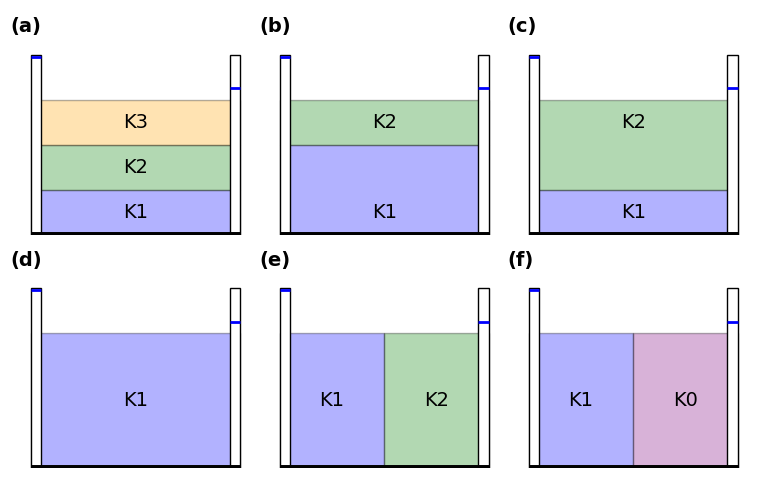

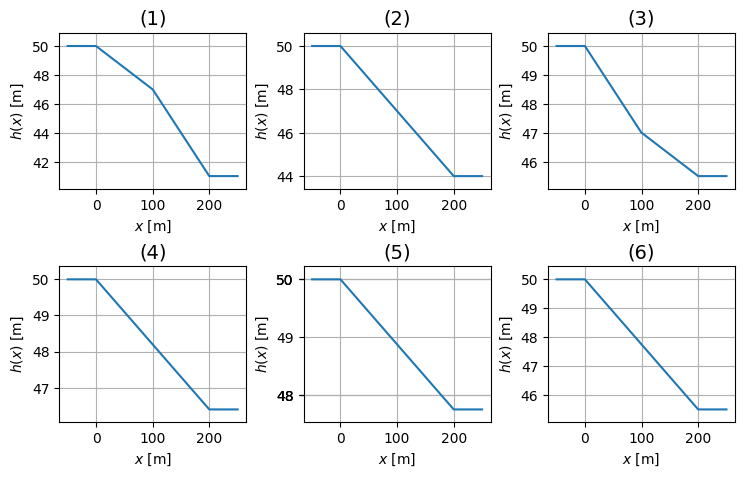

  ## Submission

  ### Enter the values of $K_{eq}$ in $\mu$/s and the profile number (1-6) for each schematic. <br> Once you have entered the values, click the "Submit All" button to check your answers. <br><br>

GridBox(children=(Label(value='Schematic:', layout=Layout(align_items='center', border_bottom='solid 1px black…

Button(description='Submit All', layout=Layout(height='30px', width='150px'), style=ButtonStyle())

Output()

In [ ]:
exercise_aquifers_layered_keq_attribution()